In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.preprocessing import image
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model

Using TensorFlow backend.


In [2]:
class_names = os.listdir('input')
print(class_names)

['Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Yellow_Leaf_Curl_Virus']


In [3]:
img_rows = 192
img_cols = 192
channels = 3
num_classes = len(class_names)

In [4]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows,img_rows,channels))
vgg_model = Model(vgg_model.input, vgg_model.get_layer('block5_conv2').output)
x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
y_cap = Dense(num_classes, activation='softmax')(x)

In [5]:
model = Model(inputs=vgg_model.input, outputs=y_cap)
model.load_weights('model/model_weights.h5')

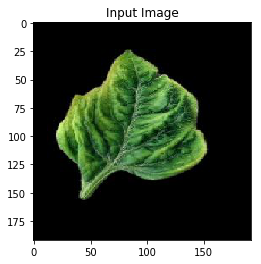

In [30]:
img = image.load_img("test_sample/yellow (1).jpg", target_size=(img_rows, img_cols))
plt.title('Input Image')
plt.imshow(img)
plt.show()

In [31]:
results = model.predict(np.expand_dims(image.img_to_array(img), axis=0))

In [32]:
single_result = results[0]

C:\Users\cvsra\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


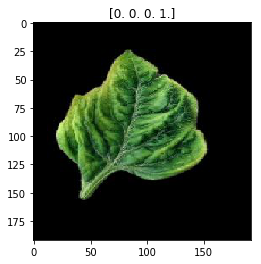

In [33]:
plt.imshow(img)
plt.title(single_result)
plt.show()

In [34]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [35]:
most_likely_class_index

3

In [36]:
class_label = class_names[most_likely_class_index]

In [37]:
print("Predicted class is : ", class_label)

Predicted class is :  Tomato_Yellow_Leaf_Curl_Virus


# !!! Thank You !!! ##